# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: I__

__Nombres de los estudiantes: Itziar Lopez Almagro y Adrian Carlos Skaczylo Sawicka__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [115]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering


In [116]:
df = pd.read_csv('housing.csv') #Creamos el data Frame
df=df.dropna() #Eliminamos las filas que contengan al menos un valor nulo
df=df.reset_index(drop=True) #reajustamos la indexacion de las filas
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

__Solución:__
Antes de analizar los datos debemos de asegurarnos que todas las columnas tienen datos numéricos y observamos que la columna 'ocean_proximity' no lo hace; pues los valores posibles que  toma dicha variable son:

In [3]:
valores_unicos = df['ocean_proximity'].unique()
print(valores_unicos)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


Mapeamos los valores de manera que se correspondan con su posicion en el array valores_unicos:

In [118]:
# Mapeo de valores categóricos a valores numéricos
mapeo = {'NEAR BAY':0,'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}
df_copia = df.copy()
df_copia['ocean_proximity'] = df_copia['ocean_proximity'].map(mapeo)
df = df_copia
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


Ahora realizamos una descripcion estadística de los datos:

In [119]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000
ocean_proximity,20433.0,1.464787,0.854216,0.0000,1.0000,1.0000,2.000,4.0000


Y procemos a estudiar la correlacion entre pares de variables:

In [120]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.181198
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.067980
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.206178
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.015917
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.007061
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.015561
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.129415
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.212014
ocean_proximity,0.181198,-0.067980,-0.206178,0.015917,0.004081,-0.007061,-0.015561,-0.129415,-0.212014,1.000000


Como son bastantes las variables con las que estamos trabajando dibujaremos solo un par de diagramas de dispersion:

- Longitud y Latitud



<Axes: xlabel='longitude', ylabel='latitude'>

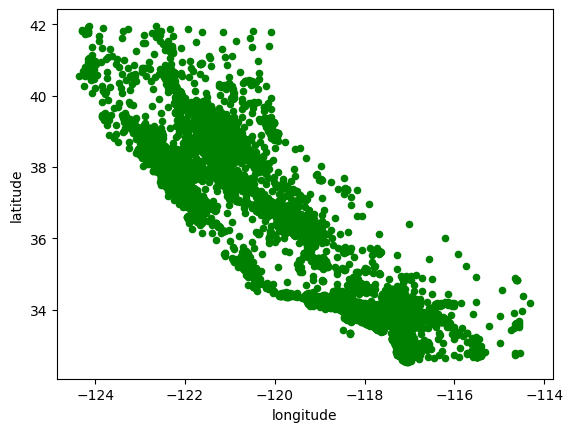

In [121]:
df.plot.scatter(x='longitude', y='latitude', c='Green')

Vemos que la relación es lineal e inversa, pues a valores muy pequeños de longitud le corresponden valores muy grandes de latitud

- Población y Hogares

<Axes: xlabel='population', ylabel='households'>

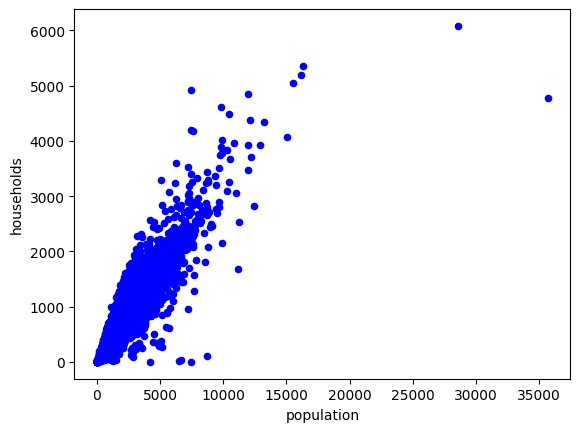

In [122]:
df.plot.scatter(x='population', y='households', c='Blue')

Al igual que antes hay un relacion lineal ; pero esta vez es directa, pues a mayor poblacion mayor numero de hogares

- Ingreso medio y Valor medio del hogar:

<Axes: xlabel='median_income', ylabel='median_house_value'>

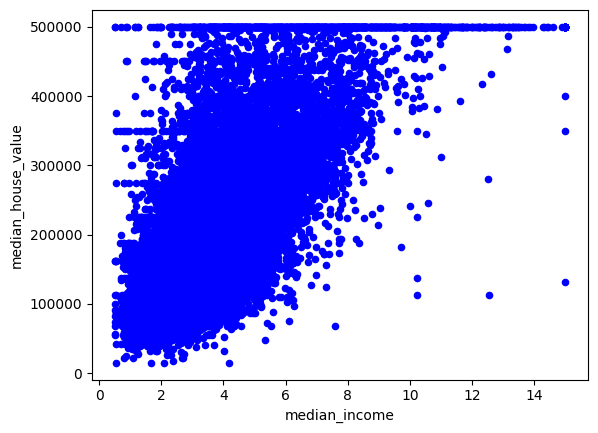

In [123]:
df.plot.scatter(x='median_income', y='median_house_value', c='Blue')

Aqui la relacion es relativamente lineal y directa; sin embargo la "anchura" de la recta es bastante gruesa. Esto se debe a que  personas con el mismo nivel de  ingreso salarial deciden comprar casas con distintos precios, es decir, hay personas que compran casas mas caras y otras que compran casas mas baratas; por lo que no tienden a comprar casas semejantes. Sin embargo, cuanto mayor es el salario mayor es el precio de la casa mas barata que compran y por eso aparece esa recta creciente "gruesa". Aunque cabe destacar los puntos aislados a la derecha del grafico, los cuales representan personas, que a pesar de tener un nivel alto de ingresos, deciden comprar casas con un coste bajo


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

__Solucion:__ 

- Frecuencia

Primero analizamos la frecuencia con la que aparecen los distintos valores de la variable OceanProximity

<Axes: >

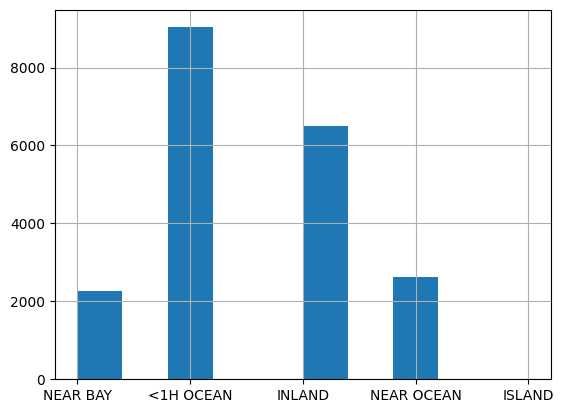

In [127]:
%matplotlib inline

mapeo = {0:'NEAR BAY',1:'<1H OCEAN', 2:'INLAND', 3:'NEAR OCEAN', 4:'ISLAND'}
df_copia = df.copy()
df_copia['ocean_proximity'] = df_copia['ocean_proximity'].map(mapeo)
df_copia['ocean_proximity'].hist()

Observamos que las casas a menos de una hora es lo que predomina, y puede parecer que no hay casas en islas; pero esto no es así. Sacando el numero exacto de casas de cada tipo vemos que hay 5 casas en islas, y comparandolo con el numero de casas a menos de una hora la diferencia es abismal : 5<<<<<9034.

In [128]:
df_copia['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

- Coste 

Además de saber que tipo de casas son mas frecuentes, puede interesarnos el precio de estas:

<Axes: xlabel='ocean_proximity'>

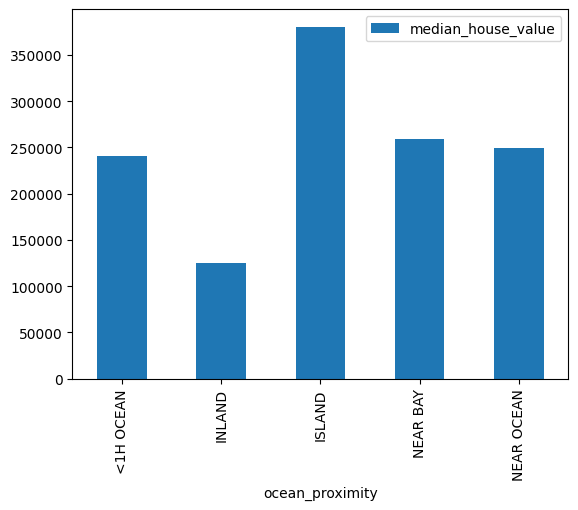

In [129]:
df_precio = df_copia.loc[:,['median_house_value','ocean_proximity']]
df_precio.groupby('ocean_proximity').mean('median_house_value').plot.bar()


Vemos que la media de precios es bastante similiar en casas a menos de una hora del mar, cerca del mar y cerca de la bahia; mientras que las casas mas baratas son las del interior y las mas caras las situadas en islas

- Edad

Veamos la edad de las casas segun su locacalizacion

<Axes: xlabel='ocean_proximity'>

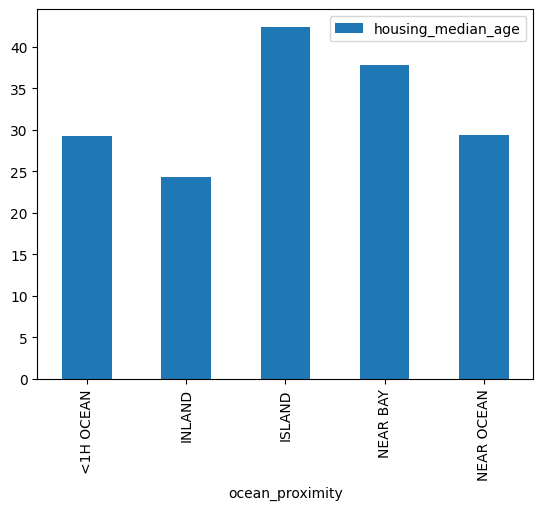

In [130]:
df_edad = df_copia.loc[:,['housing_median_age','ocean_proximity']]
df_edad.groupby('ocean_proximity').mean('housing_median_age').plot.bar()

El comportamiento es parecido al anterior

## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

__Solucion__ 


Según lo visto en el apartado 2.1) vemos que hay ciertas variables con coeficientes de correlacion cercanos a 1 o -1. Este coeficiente, por definición, cuantifica la intensidad de la relacion lineal entre dos variables, por lo que valores muy cercanos a 1 o -1  implica mayor dependencia lineal.
Las dos primeras variables con una correlacion casi "perfecta" son longitud y latitud, con lo cual se podría prescindir de una.


In [14]:
df[['longitude','latitude']].corr()

,longitude,latitude
longitude,1.000000,-0.924616
latitude,-0.924616,1.000000


Las siguientes variables son "total_bedrooms","total_rooms","population" y "household". Entre cada par de ellas el coeficiente de correlacion es bastante cercano a 1 y hemos decidido quedarnos con aquella variable que se "asemeje" al resto de las otras. Calcularemos, para cada variable, la media aritmetica de los coeficientes de correlacion con las restantes variables y nos quedaremos con el maximo:

In [15]:
df[['total_rooms','households','population','total_bedrooms']].corr()

,total_rooms,households,population,total_bedrooms
total_rooms,1.000000,0.918992,0.857281,0.930380
households,0.918992,1.000000,0.907186,0.979728
population,0.857281,0.907186,1.000000,0.877747
total_bedrooms,0.930380,0.979728,0.877747,1.000000


In [16]:
df_aux= df[['total_rooms','households','population','total_bedrooms']]
mejor_correlacion = df_aux.corr().mean().idxmax()
print("La variable más relacionada con las otras es:", mejor_correlacion)

La variable más relacionada con las otras es: households


En consecuencia, y teniendo en cuenta este factor de dependencia lineal, hemos decidido prescindir de las variables "longitude", "total_bedrooms","total_rooms" y "population"; pues aportan información un tanto redundante

In [132]:
df_reducido= df.drop(['longitude','total_bedrooms','total_rooms','population'],axis=1)
df_reducido

,latitude,housing_median_age,households,median_income,median_house_value,ocean_proximity
0,37.88,41.0,126.0,8.3252,452600.0,0
1,37.86,21.0,1138.0,8.3014,358500.0,0
2,37.85,52.0,177.0,7.2574,352100.0,0
3,37.85,52.0,219.0,5.6431,341300.0,0
4,37.85,52.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...
20428,39.48,25.0,330.0,1.5603,78100.0,2
20429,39.49,18.0,114.0,2.5568,77100.0,2
20430,39.43,17.0,433.0,1.7000,92300.0,2
20431,39.43,18.0,349.0,1.8672,84700.0,2


Respecto al rescalado de los valores hemos decido que es necesario cambiar las escalas de los datos pues los valores de las variables son bastante altos. Además, hemos decidido reescalarlos en vez de estandarizarlos ya que no sabemos la distribución teorica que siguen los datos. Aunque en caso de conocerla y ser la normal, lo más optimo sería estandarizar.

In [131]:
escalado = MinMaxScaler()
datos_escalados = escalado.fit_transform(df_reducido.values)
datos_escalados # es una array, no un dataframe

array([[0.5674814 , 0.78431373, 0.02055583, 0.53966842, 0.90226638,
        0.        ],
       [0.565356  , 0.39215686, 0.18697583, 0.53802706, 0.70824656,
        0.        ],
       [0.5642933 , 1.        , 0.02894261, 0.46602805, 0.69505074,
        0.        ],
       ...,
       [0.73219979, 0.31372549, 0.07104095, 0.08276438, 0.15938285,
        0.5       ],
       [0.73219979, 0.33333333, 0.05722743, 0.09429525, 0.14371281,
        0.5       ],
       [0.72582359, 0.29411765, 0.08699227, 0.13025338, 0.15340349,
        0.5       ]])

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

__Solucion__

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

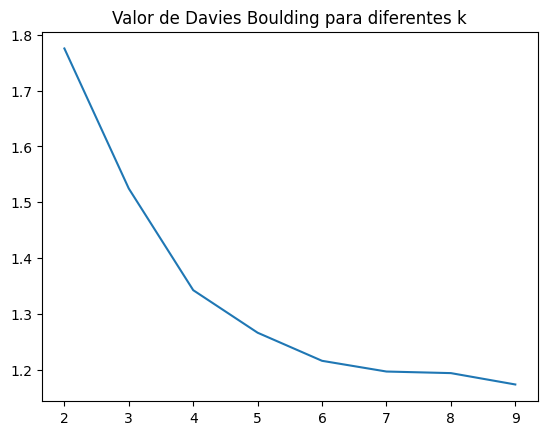

In [78]:
# Medias y desviaciones típicas de accuracy para distintos valores de k

K_MAX = 10
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(datos_escalados)
    davies_boulding[k-2] = davies_bouldin_score(datos_escalados, km.labels_) 

plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

Podemos concluir en que el número de clusters más optimo para nuestro algoritmo será 9 ya que como indica la gráfica es el menor valor.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

__Solucion__



Veamos los centros de los 9 clusters:

In [133]:
km_9 = KMeans(init='random', n_clusters=9, random_state=333)
km_9.fit(datos_escalados)
centros = km_9.cluster_centers_
print(centros)

[[0.55678124 0.85324465 0.06575185 0.20264001 0.42198312 0.03300695]
 [0.56347491 0.71356472 0.05708918 0.14327812 0.172411   0.51050856]
 [0.54302568 0.39022724 0.10020731 0.29559758 0.48923176 0.1693154 ]
 [0.14096099 0.29273162 0.12038752 0.26514944 0.41325587 0.30042153]
 [0.25740696 0.64893241 0.07644061 0.43221816 0.89117334 0.21183894]
 [0.15585481 0.71871009 0.06613976 0.19381206 0.35007442 0.26363971]
 [0.60402556 0.30685293 0.08178503 0.18915316 0.22171833 0.49678112]
 [0.11918717 0.49349525 0.0828885  0.17007623 0.25233033 0.62788385]
 [0.32358368 0.6045977  0.07941596 0.33461432 0.72973192 0.73297414]]


Vamos, a partir del array de datos reescalados, a crear un nuevo data frame asignando cada dato al cluster al cual pertenece

In [134]:
df_cluster_escalado= pd.DataFrame(data=datos_escalados,columns=df_reducido.columns) #df_escalado es un array, no un array
df_cluster_escalado = df_cluster_escalado.assign(cluster=pd.Series(data=km_9.labels_))
df_cluster = df.copy()
df_cluster['cluster']=df_cluster_escalado['cluster']
df_cluster

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2,6
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2,6
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2,6
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2,6


Una vez tenemos el dataframe con la nueva columna cluster, procedemos a representar graficamente la funcion de densidad de la muestra. Vamos a tener en cuenta solo las variables que no quitamos en el apartado 3):

- Longitude

In [135]:
df_cluster.groupby('cluster')['latitude'].describe().transpose()

cluster,0,1,2,3,4,5,6,7,8
count,1583.000000,1927.000000,1636.000000,3085.000000,1664.000000,4068.000000,2795.000000,2512.000000,1163.000000
mean,37.779311,37.842605,37.649872,33.866379,34.962200,34.006676,38.224114,33.660593,35.584884
std,0.268545,1.368013,0.471498,0.533760,1.599456,0.271176,1.307124,0.784590,1.942620
min,36.470000,34.830000,36.330000,32.610000,32.770000,32.730000,35.100000,32.540000,32.630000
25%,37.720000,36.770000,37.320000,33.670000,33.990000,33.910000,37.320000,32.790000,33.770000
50%,37.780000,37.940000,37.580000,33.870000,34.110000,34.000000,38.340000,33.810000,35.550000
75%,37.880000,38.600000,37.960000,34.140000,37.240000,34.100000,38.950000,34.120000,37.540000
max,39.440000,41.860000,39.470000,36.810000,38.010000,36.700000,41.950000,36.160000,39.010000


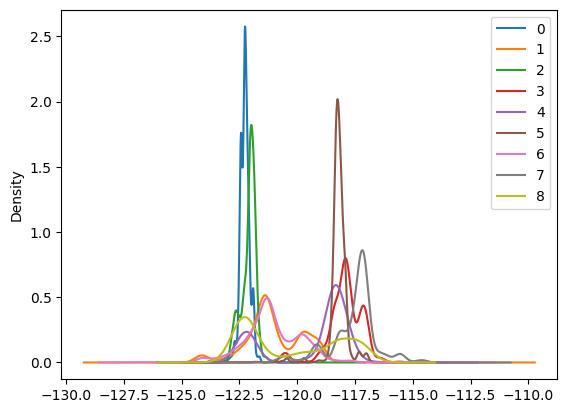

In [137]:
longitude_grafica=df_cluster.groupby('cluster')['longitude'].plot(kind='density',legend=True)

Observamos que los cluster 0 y 2 son muy parecidos tanto en la grafica como en la tabla de datos;esto mismo ocurre con los cluster 3 y 7 donde la diferencia es la desviacion tipica. Por otro lado, los clusters 3 y 7 difieren bastante del 5 y de los cluster 0 y 2. Vemos que las grafica que tienen menos altura es debido a que tiene mas dispersion, mientras que los de mas altura sus valores de desviacion tipica son relativamente pequeños





- Households

In [138]:
df_cluster.groupby('cluster')['households'].describe().transpose()

cluster,0,1,2,3,4,5,6,7,8
count,1583.000000,1927.000000,1636.000000,3085.000000,1664.000000,4068.000000,2795.000000,2512.000000,1163.000000
mean,400.837018,348.415153,610.360636,732.944895,465.835337,403.214602,498.264758,505.106290,483.588994
std,227.327587,200.259377,416.897066,587.787530,312.594486,220.532884,394.923017,320.364087,342.298402
min,7.000000,2.000000,4.000000,2.000000,1.000000,6.000000,5.000000,3.000000,3.000000
25%,261.000000,222.000000,334.000000,380.000000,273.000000,266.000000,271.000000,300.750000,282.000000
50%,365.000000,325.000000,507.500000,567.000000,395.000000,361.000000,408.000000,450.000000,406.000000
75%,489.000000,441.500000,761.250000,900.000000,577.250000,497.000000,612.500000,630.250000,601.000000
max,2538.000000,2152.000000,3701.000000,6082.000000,4930.000000,2769.000000,5358.000000,3441.000000,3931.000000


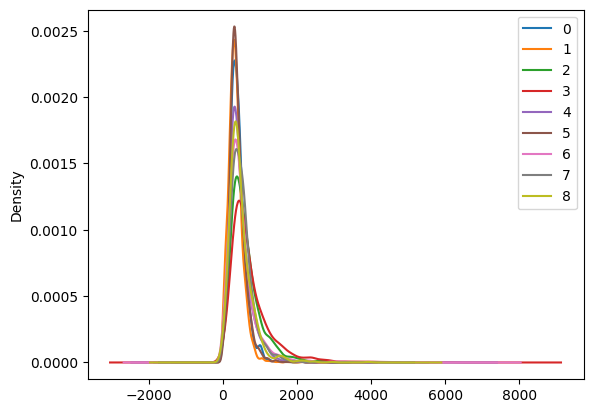

In [139]:
households_grafica=df_cluster.groupby('cluster')['households'].plot(kind='density',legend=True)

Aquí observamos que la distribución es muy parecida entre los clusters, aunque  podriamos decir que hay 3 conjuntos:  {5,1,0}, {4,8,6,7} y {3,2}. Al tener mas o menos la misma distribucion, el numero de hogares que habrá en cada cluster será bastante equitativo, pero habiendo mas en los cluster {3,2} y menos en {5,1,0}. En  los cluster {4,8,6,7} será algo intermedio de los otros dos

- Median income

In [140]:
df_cluster.groupby('cluster')['median_income'].describe().transpose()

cluster,0,1,2,3,4,5,6,7,8
count,1583.000000,1927.000000,1636.000000,3085.000000,1664.000000,4068.000000,2795.000000,2512.000000,1163.000000
mean,3.438221,2.577006,4.786124,4.344198,6.767150,3.310280,3.243085,2.966720,5.344218
std,1.277854,0.973737,1.568368,1.557234,2.771439,1.178291,1.215942,1.092531,2.223797
min,0.499900,0.499900,0.760000,0.536000,0.499900,0.499900,0.499900,0.499900,0.499900
25%,2.582600,1.870850,3.681525,3.148300,4.710800,2.375000,2.334100,2.156050,3.919600
50%,3.364300,2.463200,4.707700,4.177500,6.333500,3.236450,3.087000,2.867150,4.868400
75%,4.136800,3.122900,5.791000,5.418800,8.191700,4.125000,4.013800,3.655675,6.231450
max,15.000100,10.226400,15.000100,10.594100,15.000100,10.226400,8.966900,12.538100,15.000100


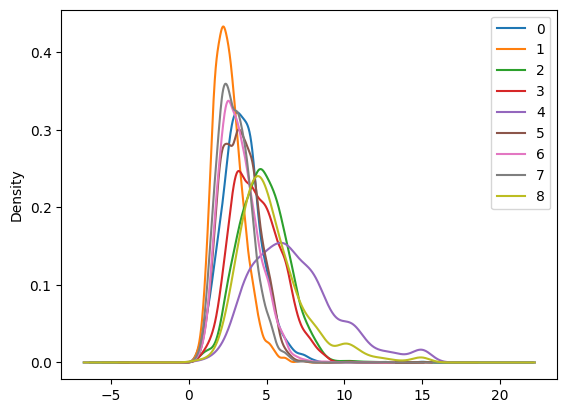

In [142]:
median_income_grafica = df_cluster.groupby('cluster')['median_income'].plot(kind='density',legend=True)

A primera vista los cluster 7,6,0,5 son muy parecidos entre sí al igual que los cluster 3,2 y 8. Los unicos clusters que son realmente disntitos son el 1 y el 4. El cluster 4 representa las personas con mayor poder adquisitvo, mientras que el 1 representa las personas con menor poder adquisitivo, y el resto de representa niveles intermedios. Vemos que los cluster 7,6,0,5 son personas con poder adquisitivo muy parecido entre sí y lo mismo ocurre con 3,2 y 8

- Median house value

In [143]:
df_cluster.groupby('cluster')['median_house_value'].describe().transpose()

cluster,0,1,2,3,4,5,6,7,8
count,1583.000000,1927.000000,1636.000000,3085.000000,1664.000000,4068.000000,2795.000000,2512.000000,1163.000000
mean,219661.656980,98518.577582,252277.384474,215403.599028,447219.854567,184797.467797,122553.272987,137292.714968,368615.058469
std,92128.569415,47733.499005,72655.633054,70548.522175,60265.442140,59180.151303,48904.413465,55013.819547,87310.372851
min,22500.000000,14999.000000,40000.000000,43000.000000,287200.000000,14999.000000,14999.000000,22500.000000,204100.000000
25%,150000.000000,64400.000000,195725.000000,162200.000000,393950.000000,145500.000000,87050.000000,93800.000000,292550.000000
50%,205700.000000,84200.000000,248050.000000,208800.000000,477100.000000,178350.000000,114300.000000,129450.000000,353700.000000
75%,275600.000000,117550.000000,297375.000000,264000.000000,500001.000000,221925.000000,150000.000000,172325.000000,449150.000000
max,500001.000000,300000.000000,500001.000000,500001.000000,500001.000000,376100.000000,310000.000000,313300.000000,500001.000000


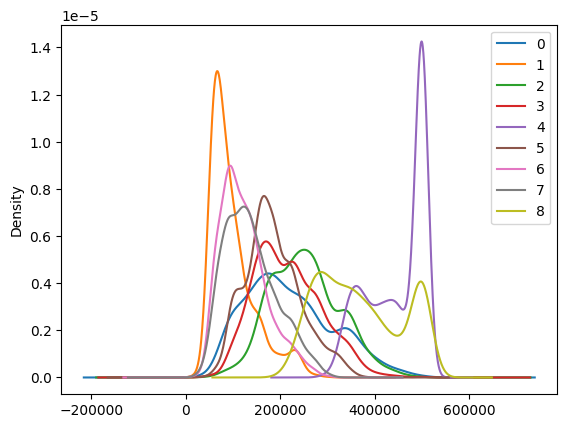

In [144]:
mhv_grafico = df_cluster.groupby('cluster')['median_house_value'].plot(kind='density',legend=True)

Claramante los cluster 1 y 4 son bastantes distintos.Observando la tabla de datos, los casas pertenecientes al cluster 4  representan las casas mas caras y el 1 las mas baratas. Las casas del cluster 8 son casas mas caras que el resto de los cluster distintos al 4, pero vemos que la grafica es un tanto dispar, i.e, parece que habrá casas pertenecientes a este cluster con precios caros pero  distintos entre sí. Para reforzar esta logica, vemos en la tabla de datos que la desviacion tipica es una de  las mas altas. Por otro lado, el cluster 0 tiene el mismo compartimiento que el 8 pero con casas baratas

- Ocean proximity

In [67]:
df_cluster.groupby('cluster')['ocean_proximity'].describe().transpose()

cluster,0,1,2,3,4,5,6,7,8
count,2631.000000,2275.000000,2965.000000,3943.000000,1610.000000,1656.000000,1253.000000,2358.000000,1742.000000
mean,1.053972,2.384615,2.020911,1.038296,0.834161,0.167271,2.930567,2.175148,0.703215
std,0.226005,0.490213,0.311012,0.191934,0.456104,0.373330,0.269539,0.385714,0.517118
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.000000
50%,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
75%,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,4.000000,3.000000,2.000000


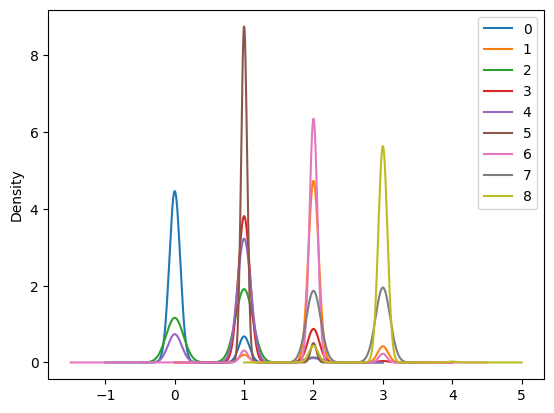

In [87]:
op_grafica = df_cluster.groupby('cluster')['ocean_proximity'].plot(kind='density',legend=True)

En general, hay clusters en los que, dependiendo de la variable, son muy semejantes y distintos a la vez.Aun así, creemos que los cluster 1(naranja),4(morado),0(azul), 8 (amarillo) y 2 (verde) mantienen bastante las diferencias entre sí; representando individuos con distintas características 

- Representación grafica Latitud y Longitdud

Hemos decidido utilizar la función plot_cluster de los ejemplos para representar los cluster

In [88]:
from matplotlib.colors import ListedColormap
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(50,50))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

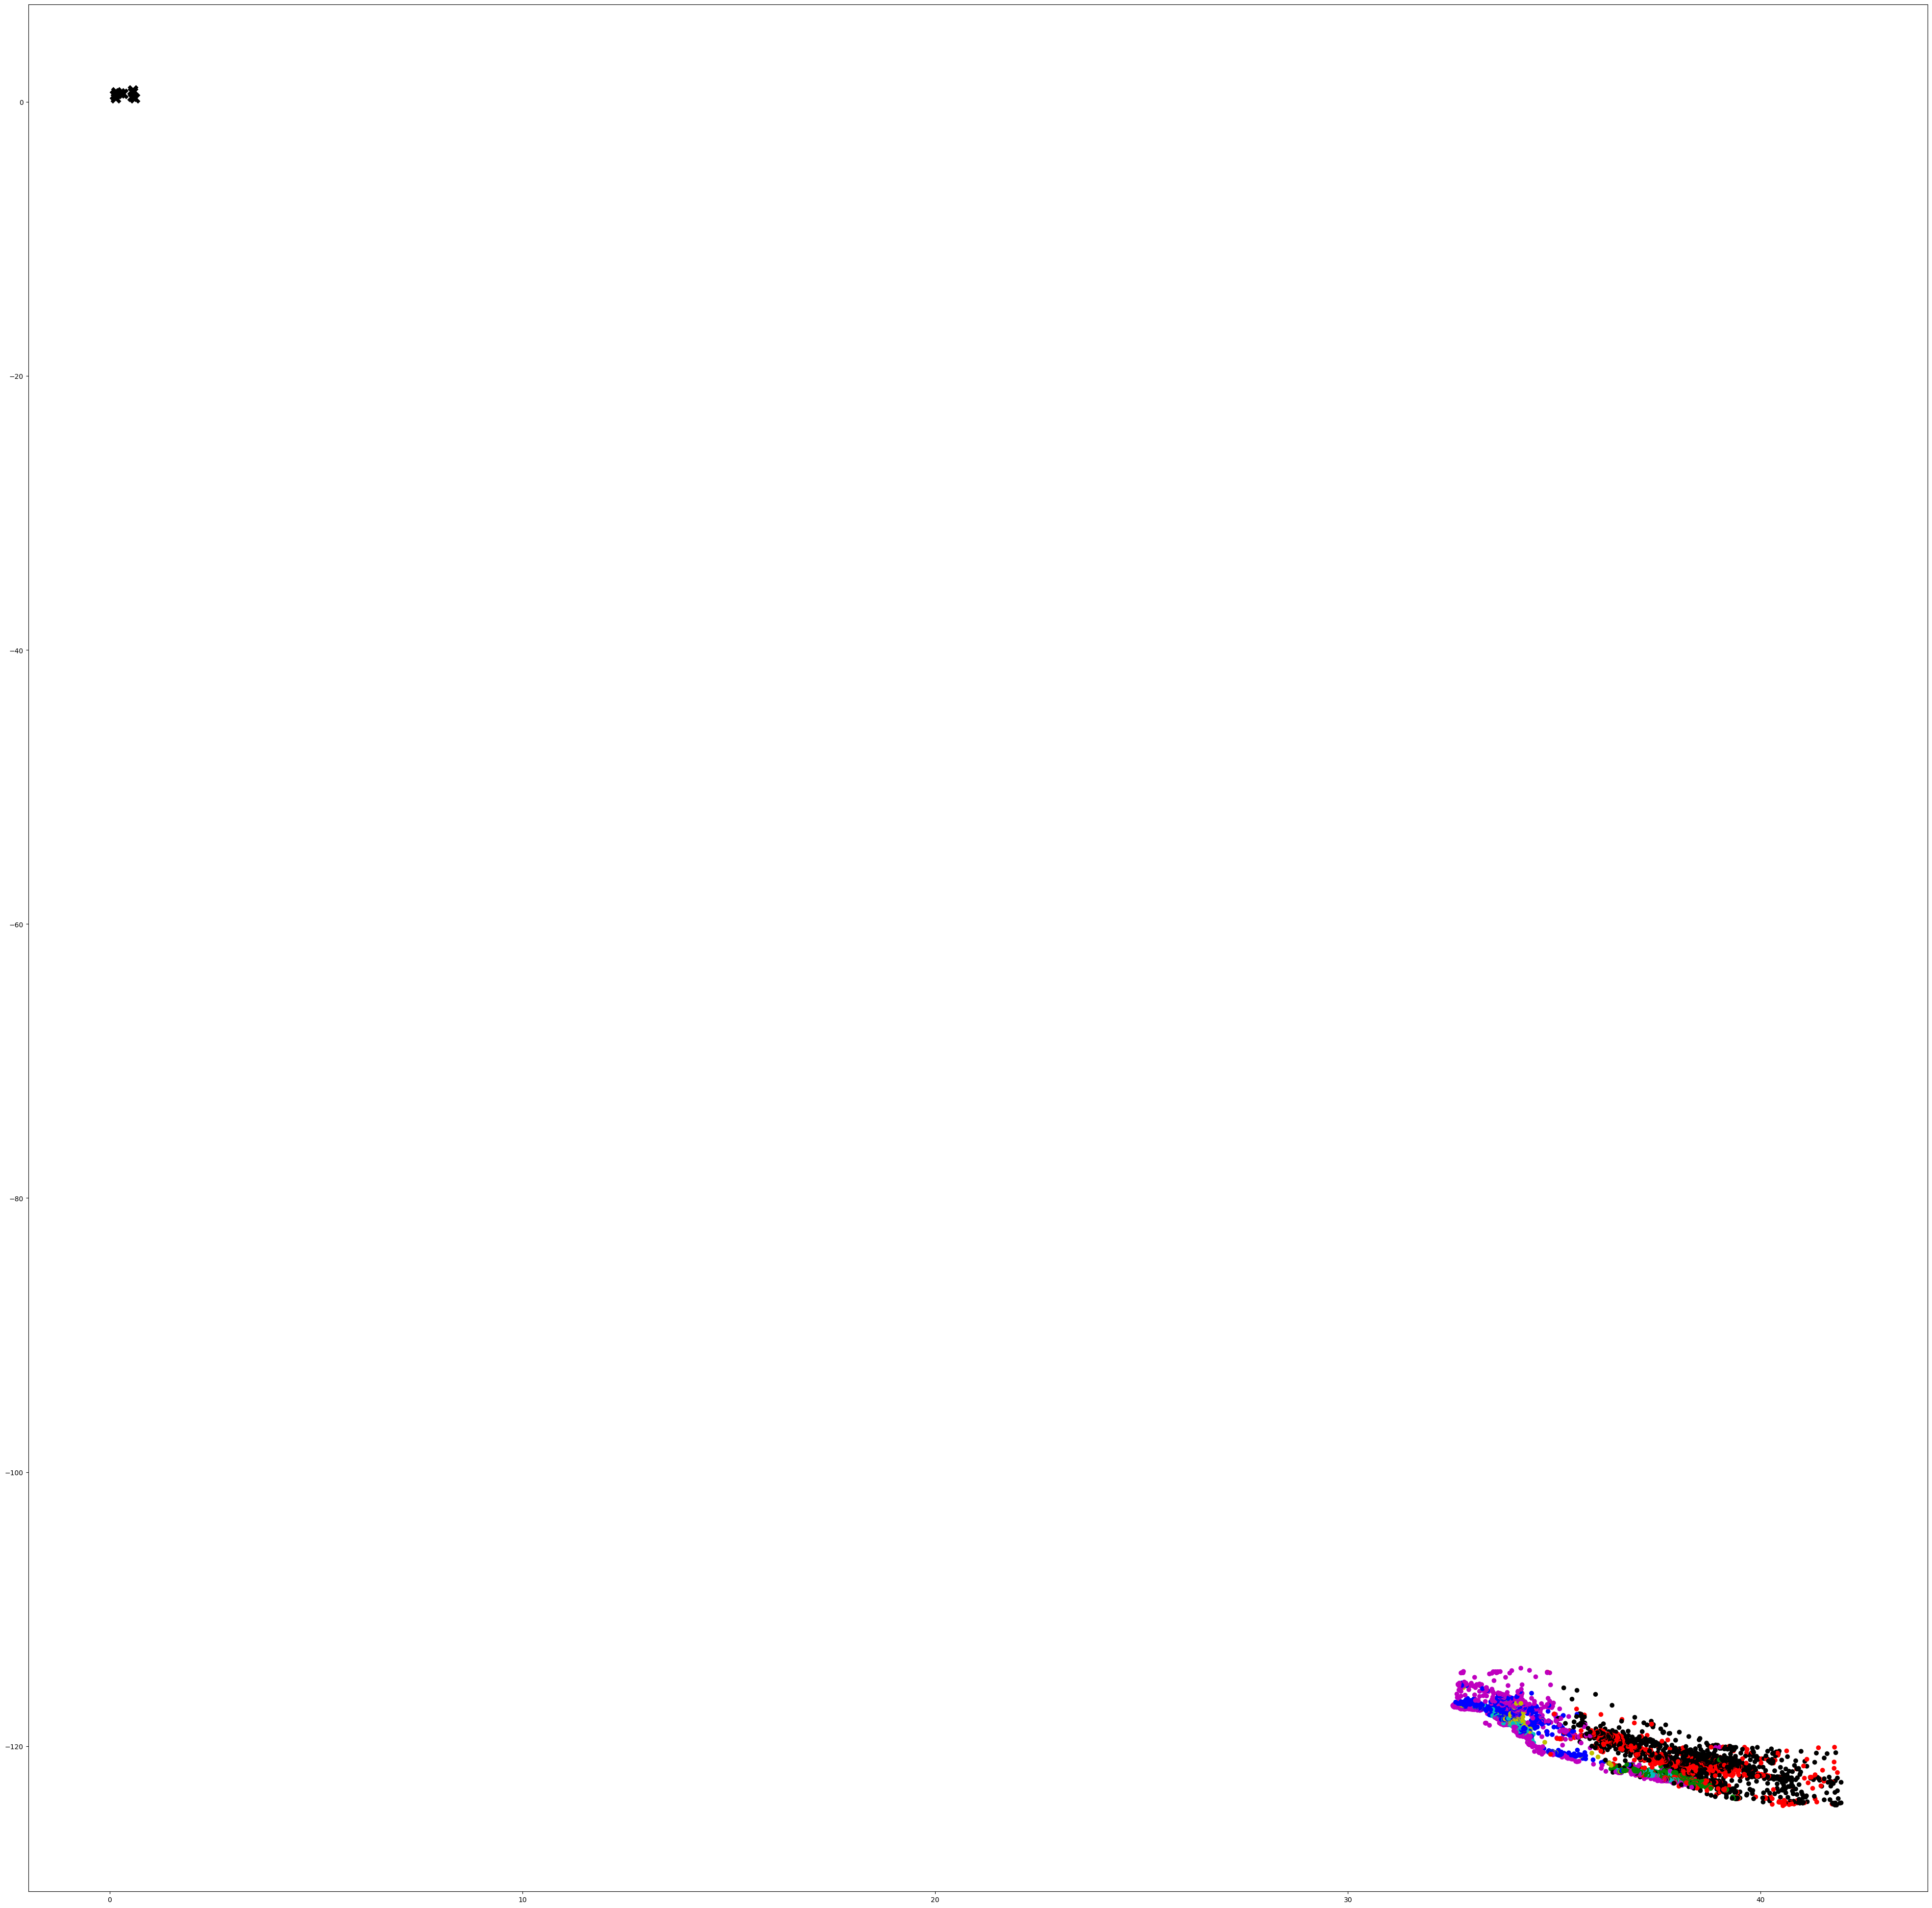

In [89]:
plot_clusters(df_cluster[['latitude','longitude']].values,km_9.labels_,centros)

Vemos que los puntos estan bastante juntos entre sí, lo cual tiene sentido pues los datos de los cluster en estas dos variables son muy parecidos y las diferencias son mínimas. Creemos que el hecho de que esten bastante alejados de los centros es debido a los valores que toman las otras variables: no hay uniformidad en los valores. Mientras que la latitud toda valores negativos, hay valores como el precio de las casas que toman valores muy grandes y además hay variables que toman valores discretos como la de proximicidad al mar

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



__Solucion__

Primero calculamos el indice de David-Bouldin:

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

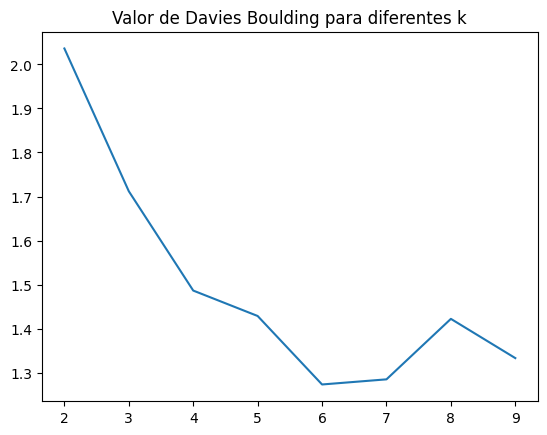

In [94]:
K_MAX = 10
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward')
    ag.fit(datos_escalados)
    davies_boulding[k-2] = davies_bouldin_score(datos_escalados, ag.labels_) 

plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

El indice optimo es para k = 6


In [95]:
ag = AgglomerativeClustering(n_clusters=6, linkage='ward')
ag.fit(datos_escalados)

AgglomerativeClustering(n_clusters=6)

In [96]:
df_cluster_escalado2= pd.DataFrame(data=datos_escalados,columns=df_reducido.columns) #df_escalado es un array, no un df
df_cluster_escalado2 = df_cluster_escalado2.assign(cluster=pd.Series(data=ag.labels_))
df_cluster2 = df.copy()
df_cluster2['cluster']=df_cluster_escalado2['cluster']
df_cluster2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2,2
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2,2
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2,2
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2,2


- Longitude

In [97]:
df_cluster2.groupby('cluster')['longitude'].describe().transpose()

cluster,0,1,2,3,4,5
count,4443.000000,2806.000000,5764.000000,1736.000000,3252.000000,2432.000000
mean,-119.199381,-117.972659,-121.376390,-122.272137,-118.198210,-117.720078
std,1.823270,1.156102,1.116814,0.139726,0.367361,0.940091
min,-123.810000,-121.400000,-124.350000,-122.590000,-122.390000,-121.790000
25%,-121.740000,-119.000000,-121.980000,-122.410000,-118.300000,-118.170000
50%,-118.380000,-117.460000,-121.480000,-122.260000,-118.210000,-117.800000
75%,-118.010000,-117.140000,-120.950000,-122.160000,-118.080000,-117.160000
max,-116.250000,-114.570000,-114.650000,-121.870000,-116.880000,-114.310000


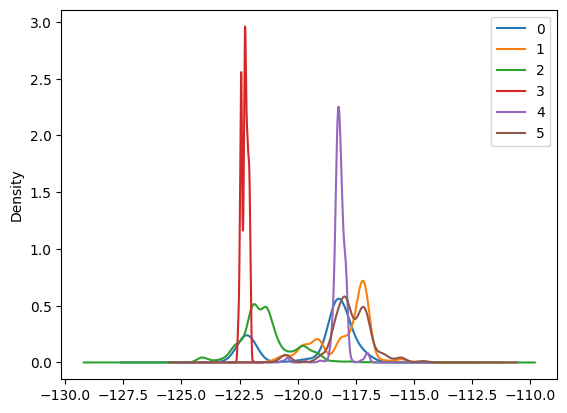

In [145]:
l_grafica = df_cluster2.groupby('cluster')['longitude'].plot(kind='density', legend=True)

Vemos que los cluster 3 y 4 son los que tienen un valor de desviacion tipica pequeño, lo cual implica que las casas que pertenezcan a esto cluster tendran posiciones en el eje x ( este  y oeste) muy parecidos, mientras que el de los demas cluster la posicion sera mas variada. Cabe destacar la similitud de los cluster 1 0 y 5

- Households

In [107]:
df_cluster2.groupby('cluster')['households'].describe().transpose()

cluster,0,1,2,3,4,5
count,4443.000000,2806.000000,5764.000000,1736.000000,3252.000000,2432.000000
mean,488.728562,461.615823,479.289556,441.128456,392.118081,795.483964
std,320.483493,267.693786,362.541301,269.745307,195.381644,659.633105
min,3.000000,3.000000,2.000000,1.000000,6.000000,2.000000
25%,284.000000,286.000000,265.000000,269.000000,262.000000,390.000000
50%,412.000000,414.500000,395.000000,384.000000,356.000000,628.000000
75%,600.500000,579.750000,589.000000,537.000000,485.250000,978.000000
max,2803.000000,2731.000000,3701.000000,2538.000000,1666.000000,6082.000000


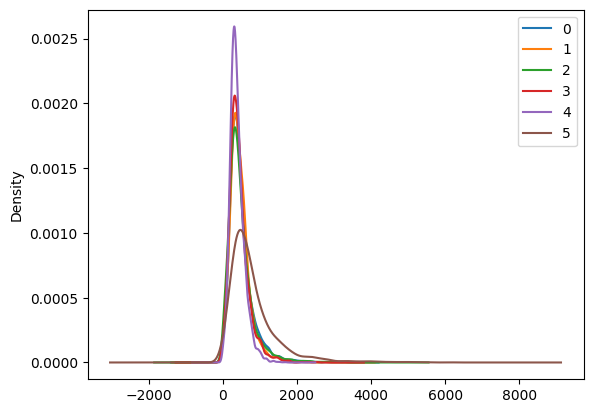

In [110]:
d_grafica = df_cluster2.groupby('cluster')['households'].plot(kind='density',legend=True)

Al igual que en el algoritmo k-means la distribucion es muy parecida; pero al ver menos cluster las funciones de densidad no estan tan "compactas". Y sacamos las mismas conclusiones: no habrá muchas diferencias en el numero de hogares que hay en cada cluster.

- Median income

In [111]:
df_cluster2.groupby('cluster')['median_income'].describe().transpose()

cluster,0,1,2,3,4,5
count,4443.000000,2806.000000,5764.000000,1736.000000,3252.000000,2432.000000
mean,5.775350,3.017103,3.389828,3.758840,3.190727,3.508641
std,2.362992,1.204524,1.386320,1.693824,1.164013,1.117165
min,0.499900,0.499900,0.499900,0.499900,0.499900,0.499900
25%,4.131300,2.120050,2.347875,2.671625,2.285675,2.706650
50%,5.510100,2.875000,3.166050,3.560650,3.125000,3.425000
75%,6.861100,3.734225,4.242425,4.500000,4.005325,4.258675
max,15.000100,8.000000,10.594100,15.000100,15.000100,8.013700


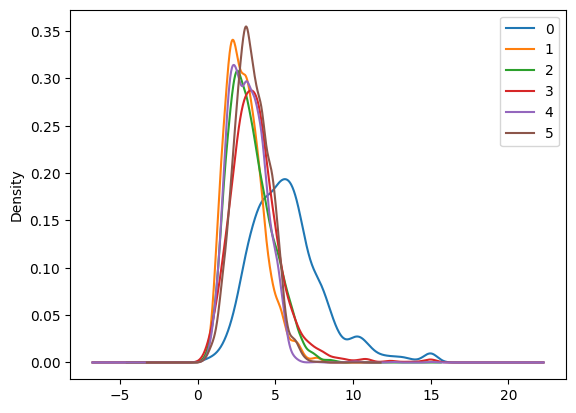

In [112]:
mi_grafica=df_cluster2.groupby('cluster')['median_income'].plot(kind='density',legend=True)

Los cluster 1,2,3,4 y5 tienen una funcion de distribucion muy parecidas mientras que la unica que destaca es la del cluster 0. Esto se debe a que esta ultima representa las personas cuyos ingresos son mas altos que el resto de los individuos y las demas personas y/o individuos se han repartido entre los otros 5 cluster con ingresos parecidos pero siempre menores que los del cluster 0

- Median house value

In [113]:
df_cluster2.groupby('cluster')['median_house_value'].describe().transpose()

cluster,0,1,2,3,4,5
count,4443.000000,2806.000000,5764.000000,1736.000000,3252.000000,2432.000000
mean,360515.539500,145303.919815,146661.832061,242290.502304,169191.851169,164958.964227
std,95807.032495,73530.493505,74973.222420,115514.766421,44744.368603,52846.170800
min,112500.000000,14999.000000,14999.000000,22500.000000,17500.000000,22500.000000
25%,278100.000000,87125.000000,87500.000000,155200.000000,138800.000000,129275.000000
50%,349000.000000,132700.000000,128300.000000,220450.000000,166900.000000,165500.000000
75%,450000.000000,187500.000000,190725.000000,318700.000000,199525.000000,198550.000000
max,500001.000000,450000.000000,500001.000000,500001.000000,284600.000000,500001.000000


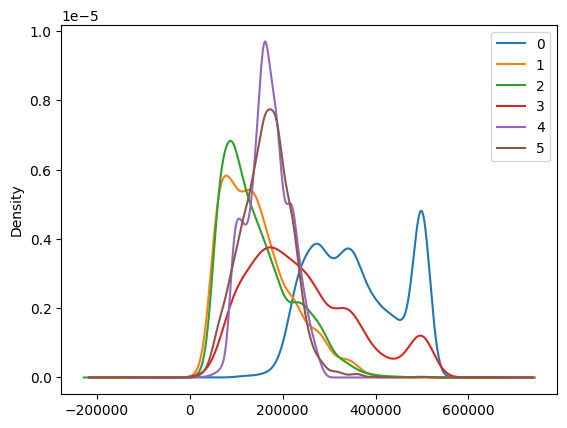

In [114]:
mhva_grafica=df_cluster2.groupby('cluster')['median_house_value'].plot(kind='density',legend=True)

Ha ocurrido exactamente lo mismo que en el caso anterior; pero esta vez hay 3 grupos distinguidos: {1,2,5,4}, {3} y {4}. Son tres niveles de coste: "asequibles", caras y muy caras.Lo podemos ver en la tabla de valores donde el precio media del cluster 4 es el mas alto, despues el del cluster 3 y los restantes son valores muy parecidos

Al haber 6 cluster creemos que cualquier eleccion de 5 que se haga es valida siempre y cuanda esten en ella el 0 y el 3 pues son los que mas se distinguen en ciertas variables